In [27]:
#Paquetes a utilizar 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [22]:
#Only numbers
def validation(value):
    while True:
        try:
            return float(value)
        except ValueError:
            value=input("ATENTION: Only numbers input: ")

## Navier Stoke ecuations

$$\dfrac{\partial \vec V}{\partial t}+\left(\vec V \cdot\bigtriangledown\right)\vec V =-\dfrac{\bigtriangledown p}{\rho}+\upsilon\bigtriangledown^2\vec V$$

$$\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}+v\dfrac{\partial u}{\partial y}+w\dfrac{\partial u}{\partial z}=\upsilon\left[\dfrac{\partial^2 u}{\partial x^2}+\dfrac{\partial^2 u}{\partial y^2}+\dfrac{\partial^2 u}{\partial z^2}\right]-\dfrac{1}{\rho}\dfrac{\partial P}{\partial x}+g_x$$

$$\dfrac{\partial v}{\partial t}+u\dfrac{\partial v}{\partial x}+v\dfrac{\partial v}{\partial y}+w\dfrac{\partial v}{\partial z}=\upsilon\left[\dfrac{\partial^2 v}{\partial x^2}+\dfrac{\partial^2 v}{\partial y^2}+\dfrac{\partial^2 v}{\partial z^2}\right]-\dfrac{1}{\rho}\dfrac{\partial P}{\partial y}+g_y$$

$$\dfrac{\partial w}{\partial t}+u\dfrac{\partial w}{\partial x}+v\dfrac{\partial w}{\partial y}+w\dfrac{\partial w}{\partial z}=\upsilon\left[\dfrac{\partial^2 w}{\partial x^2}+\dfrac{\partial^2 w}{\partial y^2}+\dfrac{\partial^2 w}{\partial z^2}\right]-\dfrac{1}{\rho}\dfrac{\partial P}{\partial z}+g_z$$

## Case study

Flux through triangular duct, in this case, the coordenates are, the duct along the z axis, them when the flux is complete developed depend of the x and y coordenates for find speed in each point.:

$$\dfrac{\partial^2 w}{\partial x^2}+\dfrac{\partial^2 w}{\partial y^2}=\dfrac{1}{\mu}\dfrac{\partial P}{\partial z}$$

In [48]:
print('Rectangular duct:')
L_x=(input('Base X :')); L_x=validation(value=L_x)

print('Duct divitions:')
D_x=(input('Div X :')); D_x=validation(value=D_x)

print('Diferential pressure and viscosity therm:')
C=(input('Diferential pressure and viscosity: ')); C=validation(value=C)


#Párametros de entrada
#C = -1000
#L_x K= 0.1 #m
L_y = 0.5*L_x*np.tan(np.pi/3) #m
Delta_x = L_x/D_x #m
Delta_y = L_x/D_x #m  
Max_iter = 500

#Calculos complementarios
No_nodos_x = int(L_x / Delta_x +1)
No_nodos_y = int(L_y / Delta_y +1)

# Solución inicial: malla -> u(k,j,i)
u = np.zeros((Max_iter,No_nodos_y,No_nodos_x))

Rectangular duct:
Base X :0.2
Duct divitions:
Div X :20
Diferential pressure and viscosity therm:
Diferential pressure and viscosity: -1000


Numero de iteraciones:  90
Numero de iteraciones:  90
Convergencia :  1e-05
Velocidad máxima es de:  0.7128213212987319 m/s


<IPython.core.display.Javascript object>


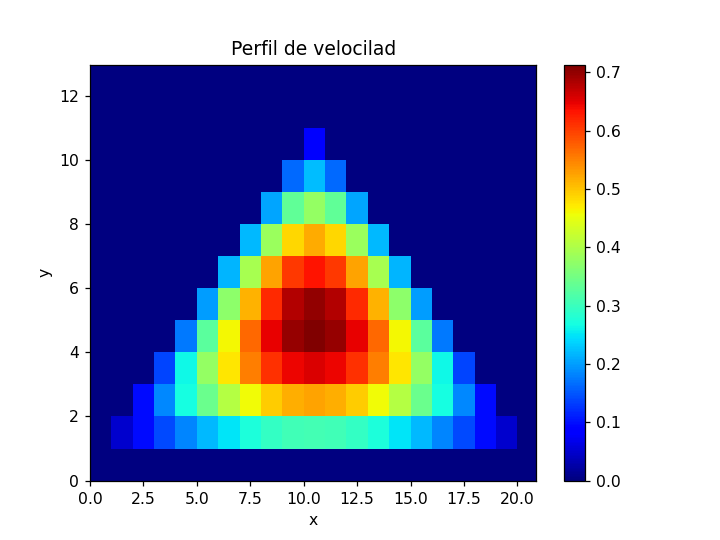

In [49]:
for k in range(1, Max_iter, 1):
    for j in range(1, No_nodos_y-1, 1):
        for i in range(j, No_nodos_x-j, 1): #u [k,j,i]
            u [k,j,i] = (-C*Delta_x**2 * Delta_y**2 + Delta_y**2 *(u [k,j,i-1] + u [k-1,j,i+1]) + Delta_x**2 * (u [k,j-1,i] + u [k-1,j+1,i]) )  /  (2*(Delta_x**2 + Delta_y**2))
            
    conv=np.max(u[k] - u[k-1])
    if conv < 1e-5: #Criterio de convergencia
        print('Numero de iteraciones: ', k+1 )
        print('Numero de iteraciones: ', k+1 )
        print('Convergencia : ', round(conv,6))
        print( "Velocidad máxima es de: " , np.max(u[k]) , "m/s")
        break
    if k == Max_iter-1: #Criterio de convergencia
        print('Numero de iteraciones: ', k+1 )
        print('Convergencia : ', round(conv,6))
        print( "Velocidad máxima es de: " , np.max(u[k]) , "m/s")

#CODIGO PARAGRAFICAR
plt.title(f"Perfil de velocilad")
plt.xlabel("x")
plt.ylabel("y")

plt.pcolormesh(u[k], cmap=plt.cm.jet, vmin=0, vmax=np.max(u[k]))
plt.colorbar()